In [3]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt

In [4]:
qiskit.__version__

'2.3.0'

# Why Quantum Circuits?
The aim of drawing quantum circuits instead of using classical Hilbert space representation lies in the visual and practical advantages it offers for understanding, designing, and implementing quantum algorithms and protocols.

While classical Hilbert space representation remains fundamental to the theoretical framework of quantum mechanics, drawing quantum circuits offers a more practical and intuitive approach for designing, simulating, optimizing, and implementing quantum algorithms in the context of quantum computation.

1. **Visualization**: They visually represent quantum information flow, aiding understanding of qubit operations and interactions.

2. **Modularity**: Different gates represent distinct operations, enabling modular design and analysis of complex algorithms.

3. **Simulation and Optimization**: Circuits can be simulated on classical computers to optimize performance and identify bottlenecks.

4. **Error Correction**: Quantum error correction codes are represented and analyzed within circuits, crucial for mitigating errors in quantum hardware.

5. **Implementation**: Circuits provide a framework for translating algorithms into physical quantum hardware, allowing for optimization tailored to specific architectures.


**Why Qiskit?**

Qiskit is an open-source quantum computing software development framework provided by IBM. It allows users to create, manipulate, and simulate quantum circuits using high-level programming languages such as Python. Qiskit also provides interfaces to access quantum hardware for executing quantum algorithms on IBM's cloud-based quantum processors.

# Draw Circuits, qubits and classical channels

**Qubit in Computational Basis Superposition:**
A qubit in a superposition of its computational basis can be represented as:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle $$

where $|0\rangle$ and $|1\rangle$ are the computational basis states, and $\alpha$ and $\beta$ are complex probability amplitudes satisfying $|\alpha|^2 + |\beta|^2 = 1$. This indicates that the qubit is simultaneously in the states $|0\rangle$ and $|1\rangle$, with respective probabilities $|\alpha|^2$ and $|\beta|^2$.

In Qiskit, qubits are by default initialized in the $|0\rangle$ state.

- **Classical Channels**: Communication channels transmitting classical information.
- **Measurements**: Operations extracting information from quantum systems by collapsing their states into specific outcomes.


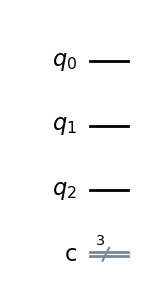

In [5]:
from qiskit import *
%matplotlib inline
# Let's create quantum circuit with 3 qubits and 3 classical bits

qc = QuantumCircuit(3, 3);
qc.draw('mpl');  # Returns a drawing of the circuit

Any time we measure a qubit we encode the result into a classical bit.

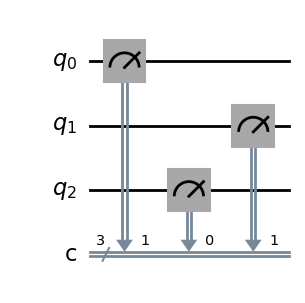

In [6]:
# Measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2],[1,1,0])
qc.draw('mpl');

# Use of Single Qubit Gates
https://docs.quantum.ibm.com/guides/construct-circuits

**X Gate (Pauli-X)**: The X gate is a fundamental single-qubit quantum gate that performs a bit-flip operation. It flips the state of a qubit from $|0\rangle$ to $|1\rangle$ and vice versa. Its matrix representation is:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

**Y Gate (Pauli-Y)**: The Y gate is another single-qubit quantum gate that performs a bit-flip operation combined with a phase change. It rotates the state of a qubit around the Y-axis of the Bloch sphere. Its matrix representation is:

$$
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
$$

**Z Gate (Pauli-Z)**: The Z gate is a single-qubit quantum gate that performs a phase-flip operation. It flips the phase of the $|1\rangle$ state, leaving the $|0\rangle$ state unchanged. Its matrix representation is:

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$

**Hadamard H**: the H gate maps the basis of Pauli-Z into the one of Pauli-X and vice-versa: $H|0\rangle =|+\rangle =\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and $H|1\rangle =|-\rangle =\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$. Its matrix representation is:

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

**Phase p**: the phase gate is a parametric operation that adds the phase $e^{i\theta}$ to the state $|1\rangle$. Its matrix representation is:

$$
p(\theta) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
$$

**Rotation R**: The $R(\theta,\phi)$ gate is a parametric operation that implements a generic rotation on the unit sphere. Its matrix representation is:

$$
R(\theta,\phi) = e^{-i\frac{\theta}{2}(\sigma_x\cos\phi  + \sigma_y \sin\phi)} = \begin{bmatrix} \cos(\frac{\theta}{2}) & -i e^{-i\phi}\sin(\frac{\theta}{2}) \\ i e^{i\phi}\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{bmatrix}
$$

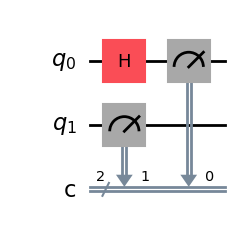

In [209]:
# Create quantum circuit with 2 qubits and 2 classical bits:
qc = QuantumCircuit(2, 2)
qc.h([0])  # Perform X-gates on qubits 0 
qc.measure([0,1], [0,1])
qc.draw('mpl');

**Task 1:** Writing a more complex circuit

## TO DO 
- Define a three-qubit circuit that applies in sequence the X gate to qubit zero and one, and Y, Hadamard, and X to qubit 2.
     Note: you can use lists as arguments of the gates when you add them to a circuit

- Implement a measurement of the three qubits into three classical bits and draw the complete circuit

<details>
<summary><b>Click to reveal solution</b></summary>

```python
# Create quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply gates to qubits as specified
qc.x([0, 1])  # Apply X-gates to qubits 0 and 1
qc.y([2])     # Apply Y-gate to qubit 2
qc.h(2)      # Apply Hadamard gate to qubit 2
qc.x(2)       # Apply X-gate to qubit 2

# Implement measurement of the three qubits into three classical bits
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the complete circuit
display(qc.draw('mpl'))

</details>
```

# Backends, Simulators and Real Quantum Devices

For the moment we only designed simple circuits but have not run the operations they describe. To do so, we need a **backend**, a library that implements how the circuit is implemented.

- **Backends**: Computational resources for executing quantum programs.
  - **Simulators**: Software tools emulating quantum computers on classical computers (~ up to 30 qubits).
  - **Real Quantum Devices**: Physical implementations of quantum processors (Some providers offer access to few-qubit devices for free).

  ## Projective Measurements, Histograms

- **Projective Measurements**: Collapse quantum states onto eigenstates of measured observables.
- **Histograms in Quantum Mechanics**: Graphical representations of measurement outcome probabilities.
- **Sampling Many Copies**: Needed due to probabilistic nature to accurately characterize quantum states.


In [7]:
from qiskit_aer import Aer, AerSimulator
sim = AerSimulator()
sim.available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

Classical bit counts:  {'10': 508, '11': 492}


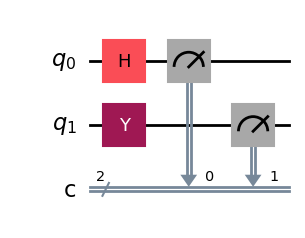

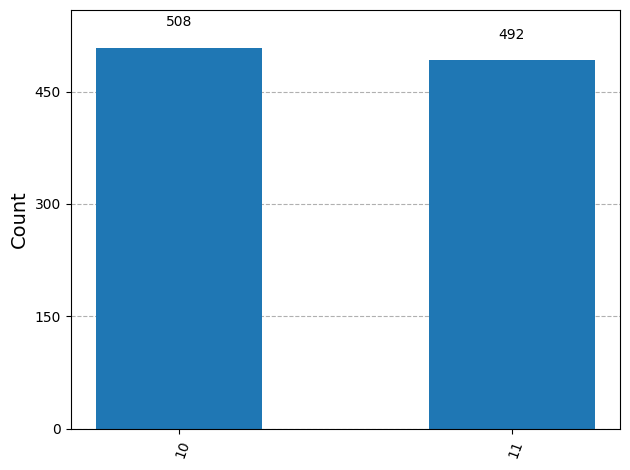

In [9]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.y(1)

qc.measure([0,1], [0,1])
 
# Execute the quantum circuit
backend = AerSimulator() # The device to run on

result = backend.run(qc, shots=1000).result()
counts  = result.get_counts(qc)
qc.draw('mpl');
print("Classical bit counts: ",counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts);

## Task 2:
Run your first (maybe?) simulation of a quantum circuit

**TO DO:**
Write a cell that simulates the circuit defined in Task 1

<details>
<summary><b>Click to reveal solution</b></summary>
    
```python

# Define the quantum circuit from Task 2
qc = QuantumCircuit(3, 3)
qc.x([0, 1])  # Apply X-gates to qubits 0 and 1
qc.y(2)       # Apply Y-gate to qubit 2
qc.h(2)       # Apply Hadamard gate to qubit 2
qc.x(2)       # Apply x-gate to qubit 2

# Define the measurement circuit ( this is a variant of the previous example)
meas = QuantumCircuit(3, 3)
meas.measure([0, 1, 2], [0, 1, 2])

# Combine the quantum circuit and measurement circuit
circ = qc.compose(meas)

# Select the backend
backend = AerSimulator()

# Draw the circuit
circ.draw('mpl');

# Execute the quantum circuit
result = backend.run(circ, shots=1000).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts);
</details>
```

## Shot noise
The variance of your measuremtns depend on the number os shots. Increase it to reduce sampling variance

[]

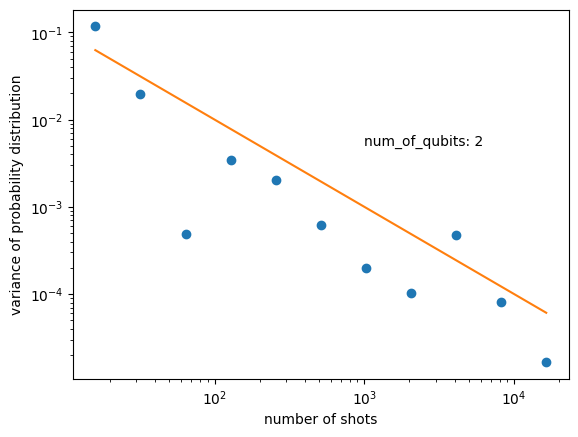

In [12]:
N=2
qc = QuantumCircuit(N, N)
qc.h(0)
qc.h(1)

qc.measure([0,1], [0,1])

shot_list = [2**j for j in range(4,15)]
var_list=[]

for shot_number in shot_list:
    job = backend.run(qc, shots=shot_number)  
    counts=job.result().get_counts()
    average=shot_number/(shot_number*2**N)
    var=0
    for key in counts:
        var=var+(counts[key]/shot_number-average)**2
        
    varbyshots=var
    var_list.append(varbyshots)
    
plt.plot(shot_list,var_list,'o')
plt.plot(shot_list,1/np.array(shot_list))
plt.xlabel("number of shots")
plt.text(1000,0.005,"num_of_qubits: "+str(N))
plt.ylabel("variance of probability distribution")
plt.loglog()

**Have you noticed anything fishy so far?**

# Bloch Sphere representation

In quantum computing, a geometric representation known as the Bloch sphere is used for interpreting qubit states. It projects a qubit's potential states onto a unit sphere's surface, where:

- The classical states |0⟩ and |1⟩ are represented by the north and south poles, respectively.
- Superpositions of |0⟩ and |1⟩ are represented by points on the sphere.

Understanding quantum algorithms and single-qubit manipulation easier with this representation.

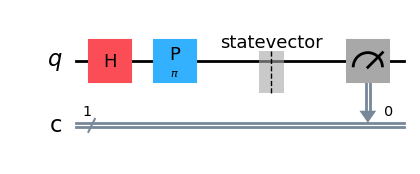

In [212]:
from qiskit.visualization import plot_bloch_vector

qc2 = QuantumCircuit(1,1)
qc2.h([0])  # Perform Hadamard on qubits 0 # try other gates here

phase = np.pi
qc2.p(phase,0) #what happens if we change this phase?

# we need to save the full wavefucntion of the system
qc2.save_statevector()


qc2.measure([0], [0])
qc2.draw('mpl');

Classical bit counts: {'0': 512, '1': 488}


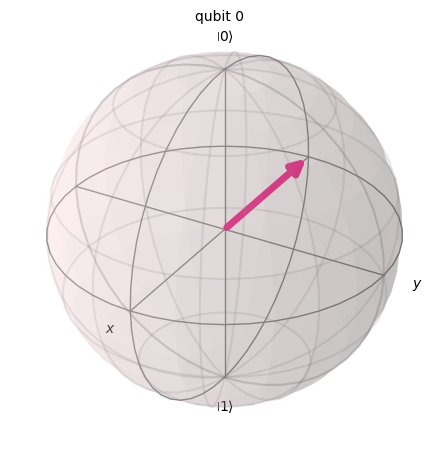

In [213]:
# Let's see the result
from qiskit import transpile
from qiskit.visualization import plot_bloch_multivector

# Execute the quantum circuit
backend = AerSimulator(method='statevector')
tqc     = transpile(qc2, backend)
job     = backend.run(tqc, shots=1000)

result  = job.result()
psi     = result.get_statevector()
plot_bloch_multivector(psi)
print("Classical bit counts:", result.get_counts())

## Task 3:
Plot the result of your circuit on the bloch sphere

**TO DO:**
Plot on the block sphere the result after the execution of the circuit defined in Task 2

<details>
<summary><b>Click to reveal solution</b></summary>
    
```python
# Define the quantum circuit from Task 2
qc = QuantumCircuit(3, 3)
qc.x([0, 1])  # Apply X-gates to qubits 0 and 1
qc.y(2)       # Apply Y-gate to qubit 2
qc.h(2)      # Apply Hadamard gate to qubit 2
qc.x(2)       # Apply X-gate to qubit 2
qc.save_statevector()

# Select the backend
backend = AerSimulator(method='statevector')

# Execute the quantum circuit
result = backend.run(qc).result()
psi = result.get_statevector(qc)

# Plot the state on the Bloch sphere
plot_bloch_multivector(psi);

</details>
```

**TO DO:**
Write a single qubit circut that implements a rotation around the x-axis by an angle of your choiche. Plot it on the bloch spere.

<details>
<summary><b>Click to reveal solution</b></summary>
    
```python
# Example of rotation: qc.rx(phi,0) Rx rotation of qubit 0 of angle phi
# Define the angle of rotation along the x-axis
angle = np.pi/4  # You can change this angle to any value of your choice

# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply the rotation gate along the x-axis with the specified angle
qc.rx(angle, 0)

'''
rx(angle,0) is equivalent to the following block. Can you show it?
qc.h(0)
qc.p(angle,0)
qc.h(0)
'''
qc.save_statevector()

# Select the backend
backend = AerSimulator(method='statevector')

# Execute the quantum circuit
result = backend.run(qc).result()
psi = result.get_statevector(qc)

# Plot the state on the Bloch sphere
plot_bloch_multivector(psi)

</details>
```

## Quantum State Tomography

The Bloch sphere representation gives complite information on the qubit wavefunction through the Bloch vector $(r_x,r_y,r_z)$. However, the projective measurements we used so far only allow to extract the amplitudes in a certain basis.  To *recover* the full density matrix from projective measurements we use **Quantum State Tomography (QST)**.

### The density matrix

Any (pure or mixed) single‐qubit state can be written as a density operator
$$
\rho \;=\; \sum_j p_j\,|\psi_j\rangle\langle\psi_j|,
\quad
p_j\ge 0,\;\sum_j p_j=1.
$$
Equivalently, in the Pauli basis,
$$
\rho = \frac{1}{2}\Bigl(I + r_x\,X + r_y\,Y + r_z\,Z\Bigr),
\quad
\mathbf{r}=(r_x,r_y,r_z),\;\|\mathbf r\|\le1.
$$

A valid $\rho$ always satisfies:
- **Hermitian**: $\rho = \rho^\dagger$  
- **Unit trace**: $\mathrm{Tr}(\rho) = 1$  
- **Positive semidefinite**: all eigenvalues $\ge0$

To find $r_i$ in practice we measure in the $X,Y,Z$ bases and compute
$$
r_i = \langle\sigma_i\rangle
    = \frac{n_{+i} - n_{-i}}{N},
\quad i\in\{X,Y,Z\},
$$
where $n_{+i},n_{-i}$ are the counts of “+1”/“–1” outcomes in the $i$‐basis out of $N$ shots.


measurement in the Z basis:  {'1': 1521, '0': 8479}
measurement in the X basis:  {'1': 1449, '0': 8551}
measurement in the Y basis:  {'0': 5006, '1': 4994}


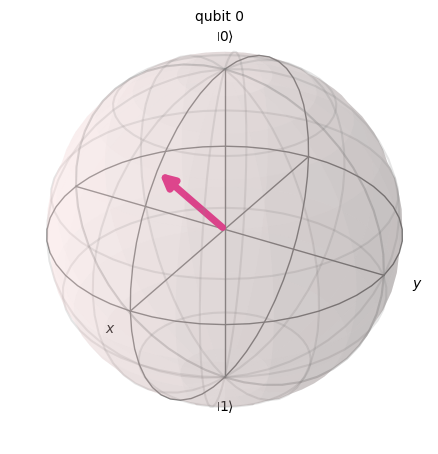

In [214]:
qc = QuantumCircuit(1,1)

theta = 1/4*np.pi
phi = 1/2*np.pi
qc.r(theta, phi,0) #this is a rotation assocaited with the spherical coordinates theta and phi

qc.save_statevector()

meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_y = QuantumCircuit(1,1)
meas_y.p(-np.pi/2,0)
meas_y.h(0)
meas_y.measure(0,0)

backend = AerSimulator(method='statevector')

circ = qc.compose(meas_z)
num_shots=10000
result = backend.run(circ, shots=num_shots).result()
psi = result.get_statevector()
plot_bloch_multivector(psi);
counts_z = result.get_counts()
print('measurement in the Z basis: ', counts_z)

circ = qc.compose(meas_x)
result = backend.run(circ, shots=num_shots).result()
counts_x = result.get_counts()
print('measurement in the X basis: ', counts_x)

circ = qc.compose(meas_y)
result = backend.run(circ, shots=num_shots).result()
counts_y = result.get_counts()
print('measurement in the Y basis: ', counts_y)

### Task 4

**TO DO:** Reconstruct the density matrix of the qubit from the measurements in the X, Y, and Z basis. Do you obtain a pure state? Why or why not? 

<details>
<summary><b>Click to reveal solution</b></summary>
    
```python
ID = np.eye(2,dtype=complex)
SX = np.array([[0,1],[1,0]],dtype=complex)
SY = np.array([[0,-1j],[1j,0]])
SZ = np.array([[1,0],[0,-1]])

shots=num_shots

sz_ave = (counts_z['0']-counts_z['1'])/shots
sx_ave = (counts_x['0']-counts_x['1'])/shots
sy_ave = (counts_y['0']-counts_y['1'])/shots

rho =  ID + SZ*sz_ave + SX*sx_ave + SY*sy_ave
rho/=2

# Sanity checks
print("\nSanity checks:")
trace_rho = np.trace(rho_np)
eigs = np.linalg.eigvalsh(rho_np)
purity = np.trace(rho_np @ rho_np).real

print(f"\nTrace(ρ) = {trace_rho:.3f}")
print(f"Eigenvalues = {eigs}")
print(f"Purity Tr[ρ²] = {purity:.3f} " +
      ("(≈1 → pure)" if abs(purity-1)<1e-2 else "(<1 → mixed)"))

# Cross‐check expectations
# These should match the raw sx, sy, sz above.
print("\nConsistency checks:")
print("⟨X⟩ from ρ:", np.trace(rho_np @ SX).real)
print("⟨Y⟩ from ρ:", np.trace(rho_np @ SY).real)
print("⟨Z⟩ from ρ:", np.trace(rho_np @ SZ).real)

# Bloch‐vector visualization
bloch_vec = [sx_ave, sy_ave, sz_ave]
fig = plot_bloch_vector(bloch_vec, title="Reconstructed Bloch Vector")
plt.show()

</details>
```

# Use of Two Qubit Gates

Up to now, we have explored how to create, measure, and visualize quantum superposition in a single qubit. This is indeed one of the fundamental ingredient of quantum computation. Let us now focus on a second one: **entanglement**.

**CNOT Gate (Controlled-NOT)**: The CNOT gate flips the second qubit (target qubit) if the first qubit (control qubit) is in the state |1⟩.  Its matrix representation in the standard computational basis is:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}
$$

Suppose we have two qubits: the control qubit $|c⟩$ and the target qubit $|t⟩$.

- If the control qubit is in state $|0⟩$, the target qubit remains unchanged.
- If the control qubit is in state $|1⟩$, the target qubit is flipped.

For example, if the control qubit $|c⟩$ is in state $|1⟩$ and the target qubit $|t⟩$ is in state $|0⟩$, applying the CNOT gate would result in the target qubit being flipped to $|1⟩$.

So, ${\rm CNOT}(|c⟩ \otimes |t⟩) = |c⟩ \otimes (|c⟩ \oplus |t⟩)$.

Where the modulus 2 sum, is denoted by $\oplus$, also known as the XOR operation, is a binary operation that returns 1 if the number of 1s in the input is odd, and 0 otherwise. In the context of qubits, it's essentially a bit-wise addition operation where the result is taken modulo 2.


**Taks** Another common two-qubit gate is the CZ (control-Z), which acts as ${\rm CZ} = \frac{(1+Z)_c}{2}\otimes \mathbb{1}_t+\frac{(1-Z)_c}{2}\otimes Z_t$. Its matrix representation is 
$$
{\rm CZ}  = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{bmatrix}
$$

Show that ${\rm CZ}$ and ${\rm CNOT}$ gates are equivalent up to single-qubit operations.

Result:  {'00': 538, '11': 486}


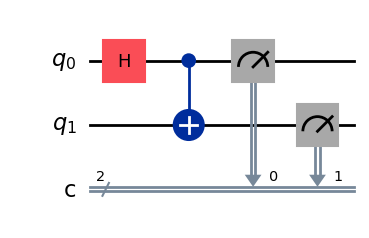

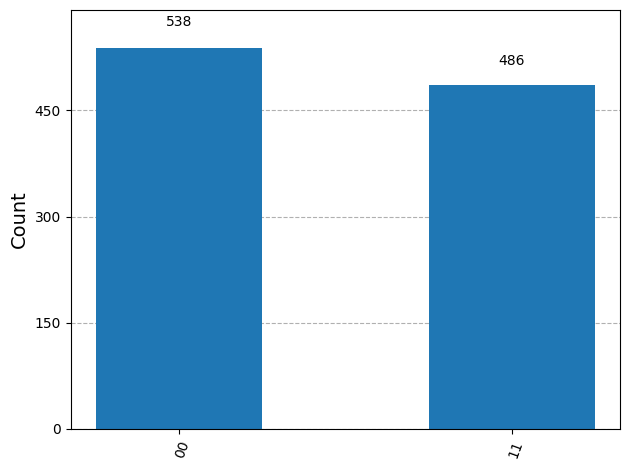

In [15]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
qc.draw('mpl');    

job = backend.run(qc)      # Run the experiment
result = job.result()  # Get the results
# Interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())
plot_histogram(result.get_counts());

## Task 5: Building a Bell State

The Bell states are commonly used for many quantum algorithms. They are maximally entangled two-qubit states; here is an example:

$$ |\Phi^+ \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

A Bell state is a pair of entangled qubits in a specific quantum state where the measurement outcome of one qubit is perfectly correlated with the measurement outcome of the other qubit. 

Another common choice for a Bell state is the combination $$ |\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $$
**TO DO** 
- Write a circuit that prepares $|\Psi^+ \rangle $

- What should you do to change the phase of these states? E.g., to prepare $$ |\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) $$.

<details>
<summary><b>Click here to reveal the solution  </b></summary>
    
```python
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)

qc.cx(0,1)

qc. barrier()

qc.measure([0,1], [0,1])
qc.draw('mpl');    

job = backend.run(qc, shots=1000)      ## SHOW DIFFERENCE SHOTS STATISTICS ##
result = job.result()  
counts=result.get_counts()
print("Result: ", counts)
plot_histogram(counts); 
```
</details>


## Local operations doesn't destroy entanglement

Result:  {'11': 241, '00': 251, '10': 248, '01': 260}


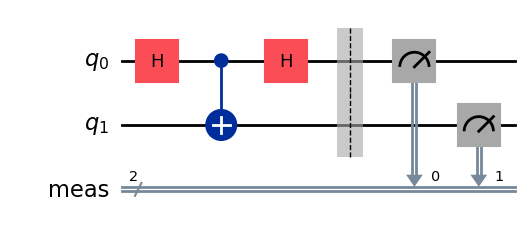

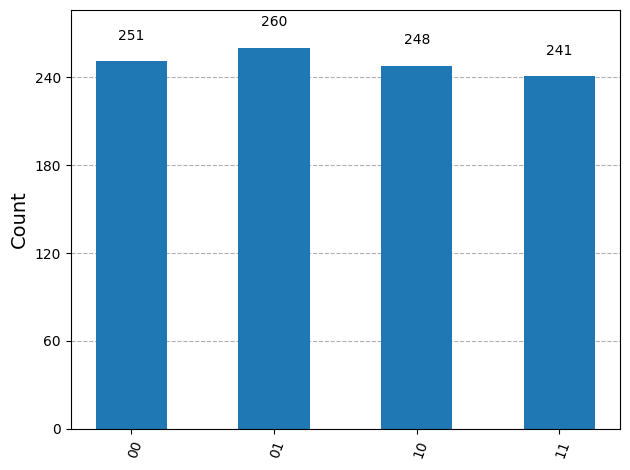

In [221]:
import numpy as np
backend = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(2)
qc.h(0)

qc.cx(0,1)

# rotate by z
#theta=np.pi
#qc.rz(theta,0)    ##These two commands rotate by Pi the qubits around the Z axis (i.e. the computational basis)##
#qc.rz(theta,1)

#qc.h(0) #This is analogue to rotation

qc.h([0]) #This is analogue to rotation

qc.measure_all()
qc.draw('mpl') ;    

job = backend.run(qc, shots=1000)      ## SHOW DIFFERENCE SHOTS STATISTICS ##
result = job.result()  
counts=result.get_counts()
print("Result: ", counts)

plot_histogram(counts);

Result:  {'01': 255, '11': 259, '00': 246, '10': 240}


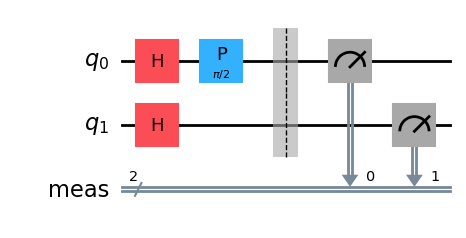

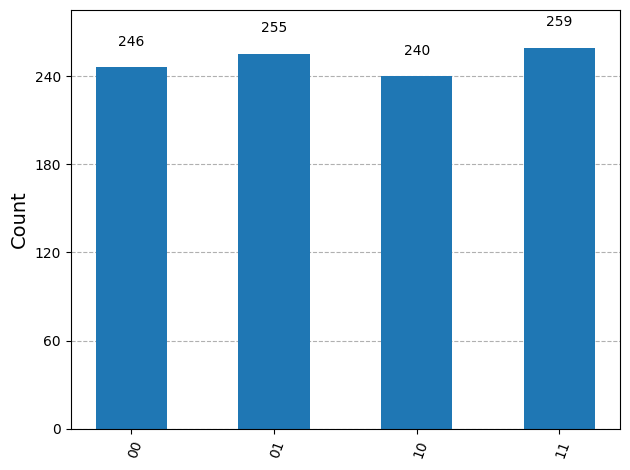

In [222]:
# Second circuit
qc2 = QuantumCircuit(2)
qc2.h([0,1])
qc2.p(np.pi/2,0)

qc2.measure_all()
qc2.draw('mpl') ;    

job = backend.run(qc2, shots=1000)      ## SHOW DIFFERENCE SHOTS STATISTICS ##
result = job.result()  
counts2=result.get_counts()
print("Result: ", counts2)

plot_histogram(counts2);

Result:  {'11': 233, '01': 258, '10': 252, '00': 257}


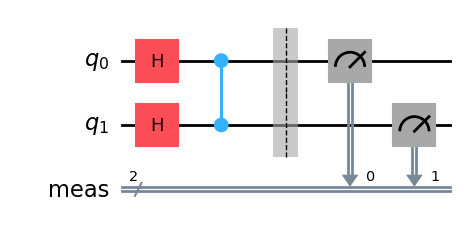

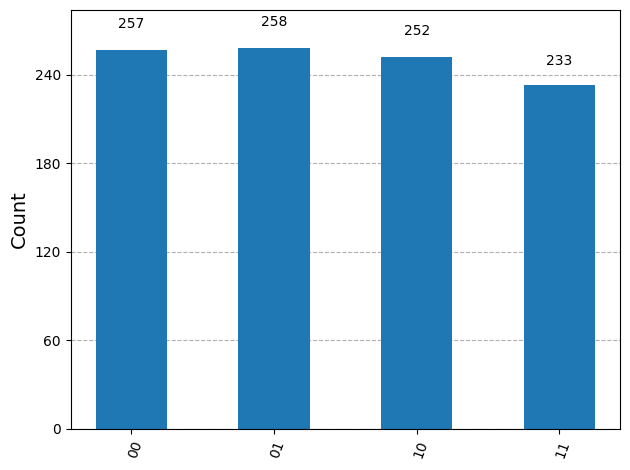

In [200]:
# Third circuit
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.h(1)


qc3.cz(0,1)

qc3.measure_all()
qc3.draw('mpl');
job = backend.run(qc3, shots=1000)      ## SHOW DIFFERENCE SHOTS STATISTICS ##
result = job.result()  
counts3=result.get_counts()
print("Result: ", counts3)

plot_histogram(counts3);

## Task 6

**TO DO:** The three circuits above produce similar probability distributions when we measure the qubits in the Z basis. Do they act on the circuit in the same way? If not, how do we highlight the presence of entanglement?

<details>
<summary><b>Click here to reveal solution </b></summary>
    Simply add an Hadamard gate on qubit 1 and check the results =)
</details>

# Errors

Real quantum hardware is not perfect and any algorithm is subject to **errors**. These originates from the coupling between the quantum circuit and the surrounding environment, imperfct control signals, thermal fluctuations, ecc...

A simple error channel that we see here is the so called bit-flip: any time we perform an operation on a qubit, there is a probability $p_{\rm err}$ that a spuriuos $X$ operation changes its state.

In [31]:
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, pauli_error)

In [32]:
# Example error probabilities
p_reset = 0.00
p_meas = 0.10
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'u1', 'measure', 'u3']
  All-qubits errors: ['measure', 'u1', 'u2', 'u3', 'cx']


Result:  {'0': 141, '1': 859}


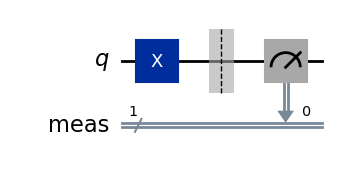

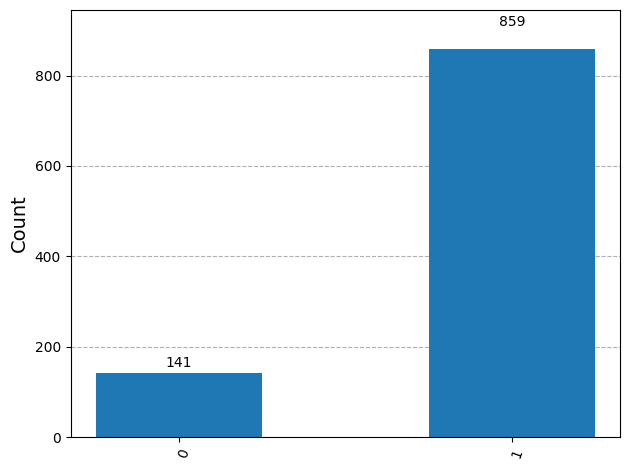

In [33]:
N = 1
qc = QuantumCircuit(N)
qc.x(0)  

qc.measure_all() # This is a way to automatically measure all qubits and add the necessary classical registers. 

qc.draw('mpl'); 

sim_noise = AerSimulator(noise_model=noise_bit_flip)
# Transpile circuit for noisy basis gates
circ_tnoise = transpile(qc, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise, shots=1000).result()
counts_bit_flip = result_bit_flip.get_counts(0)

print("Result: ", counts_bit_flip)
plot_histogram(counts_bit_flip);

Result:  {'01': 136, '10': 121, '00': 388, '11': 355}


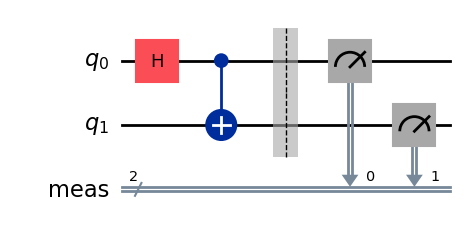

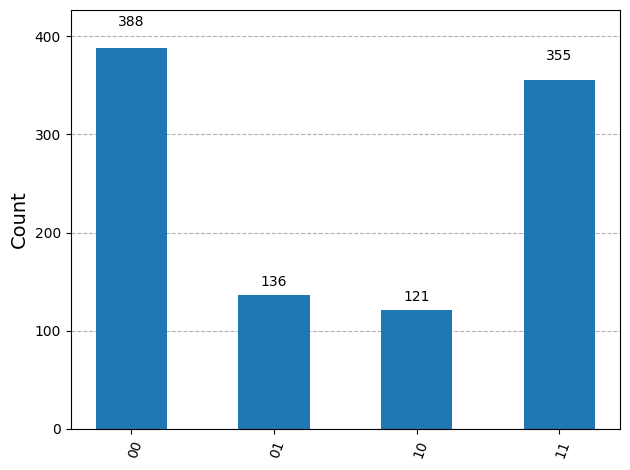

In [34]:
N = 2
qc = QuantumCircuit(N)

qc.h(0)  
qc.cx(0,1)

qc.measure_all() # This is a way to automatically measure all qubits and add the necessary classical registers. 

qc.draw('mpl'); 

sim_noise = AerSimulator(noise_model=noise_bit_flip)
# Transpile circuit for noisy basis gates
circ_tnoise = transpile(qc, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise, shots=1000).result()
counts_bit_flip = result_bit_flip.get_counts(0)

print("Result: ", counts_bit_flip)
plot_histogram(counts_bit_flip);

IBM Quantum Composer for playing with circuits: https://quantum-computing.ibm.com/composer/files/ad03204f188ae43f771d5623125b1883